In [1]:
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv("duplicate_questions_pairs (1).xls")

In [3]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
print('The shape of data :',df.shape)

The shape of data : (404290, 6)


# DATA PREPROCESSING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [8]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(404287, 6)

In [11]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
df.duplicated().sum()

0

0    255024
1    149263
Name: is_duplicate, dtype: int64
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


<Axes: >

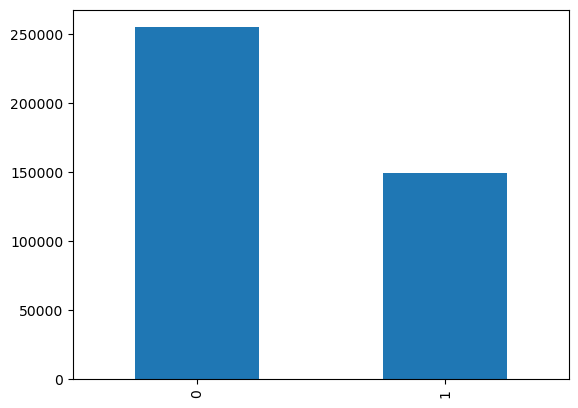

In [13]:
#duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
new_df = df.sample(30000,random_state=2)

In [15]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55311
Number of questions getting repeated 3485


In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess(q):
    q = re.sub(r'[^a-zA-Z0-9%$₹€@]', ' ', q.lower().strip())
    q = q.replace('%', ' percent').replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ').replace('€', ' euro ').replace('@', ' at ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    tokens = [word for word in word_tokenize(q) if word not in stopwords.words('english')]
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to C:\Users\Nischay
[nltk_data]     kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Nischay
[nltk_data]     kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Nischay
[nltk_data]     kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,learn norwegian,quickest way learn norwegian,1
45407,45407,81383,81384,currency rate determined,exchange rate determined,1
286200,286200,285024,406729,substitution,substitute caciocavallo,0
157195,157195,245856,245857,make iphone 4 faster io 9 2,iphone 4 make faster comfortable use,1
154346,154346,242075,242076,help girlfriend cope parent divorce,help girlfriend parent divorce,1


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Vectorizing text data
tfidf = TfidfVectorizer()
q1_vectors = tfidf.fit_transform(new_df['question1'])
q2_vectors = tfidf.transform(new_df['question2'])


In [21]:
# Concatenating question vectors
import scipy.sparse as sp
X = sp.hstack((q1_vectors, q2_vectors))
y = new_df['is_duplicate']

In [22]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Making predictions
y_pred = model.predict(X_test)


In [25]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7255
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80      3740
           1       0.70      0.48      0.57      2260

    accuracy                           0.73      6000
   macro avg       0.72      0.68      0.68      6000
weighted avg       0.72      0.73      0.71      6000

